<a href="https://colab.research.google.com/github/tg2600/Olympic-Tracker/blob/main/Project_Implentation_Olympic_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary:  This project involves developing a Python application that fetches and processes Olympic Games medal data. To start with, this application includes functionality to display the top 20 countries by gold medal and total medal counts (for 2024) and the visualization of such data. Additionally, the application can provide 2024 medal counts for specific countries upon user input, with appropriate handling and correction of country names from Portuguese to English. The goal is to expand the functionality of this project and potentially include other more comprehensive API source(s) (that we have been trying to unlock). In the future, this application could be used by fans of the Olympics and other real time users to track their favorite countries and (API-source depending) athletes, get real-time updates on medal standings, and analyze historical performance trends.

Note:  Due to some technical issues accessing more comprehensive API sources, we are currently relying on a free API source that provides Olympic data for 2024.  








README FILE

"""
# Olympic Games Medal Tracker

## Project Summary

This application fetches Olympic medal data, focusing on the 2024 games. The initial functionality includes:

- Displaying the top 20 countries by gold medal and total medal counts.
- Visualizing medal data using bar charts.
- Providing medal counts for specific countries, with the ability to handle and correct country names from Portuguese to English.

### Additional Features

Based on feedback and to increase the scope of the project, the following features have been added:

- **Country Flags Display:** The app shows the flags of the top 20 countries alongside their medal counts.
- **Medal Winners Lookup:** The app allows users to look up all the specific medal winners and their events for a specific country.


## Installation

'''bash
cd olympic-medal-tracker
pip install -r requirements.txt
'''

## Usage

### Fetching and Displaying Medal Data

To fetch and display the top 20 countries by gold medal counts:

'''python
python olympic_medal_tracker.py
'''

This will generate a bar chart visualizing the medal counts for the top 20 countries.



To look up the medal winners for a specific country, you can use:

'''python olympic_medal_tracker.py
'''

Replace \`USA\` with the appropriate country code.

## Documentation

### API Reference

Data is from [Codante.io Olympic Games API](https://apis.codante.io/olympic-games/countries).


 """

                Country  Gold Medals
0                   USA           40
1                 China           40
2                 Japan           20
3             Australia           18
4                France           16
5           Netherlands           15
6        United Kingdom           14
7           South Korea           13
8                 Italy           12
9               Germany           12
10          New Zealand           10
11               Canada            9
12          Uzbequistão            8
13              Hungary            6
14              Espanha            5
15               Sweden            4
16               Quênia            4
17              Noruega            4
18              Irlanda            4
19               Brazil            3
20  Repúb. Islâmica Irã            3
21              Ucrânia            3
22              Romênia            3
23              Geórgia            3
24              Bélgica            3
25             Bulgária            3
2

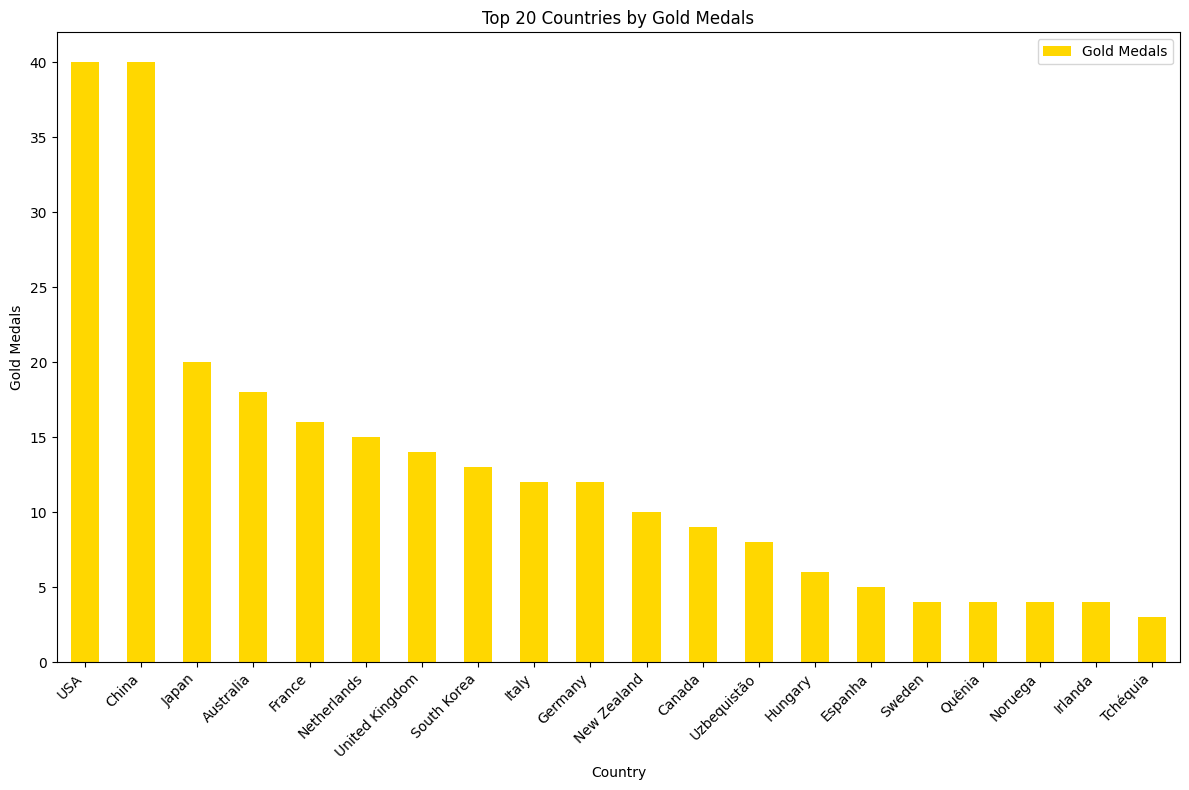

In [ ]:
# Process and visualize gold medal counts data for 2024
!pip install pycountry
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pycountry

# Request URL for the Codante.io API
request_url = "https://apis.codante.io/olympic-games/countries"

#country flag
def get_flag(country_name):
    try:
        # Lookup the country code using pycountry
        country_code = pycountry.countries.lookup(country_name).alpha_2
        # Convert the country code to the corresponding flag emoji
        flag_emoji = chr(127462 + ord(country_code[0]) - ord('A')) + chr(127462 + ord(country_code[1]) - ord('A'))
        return flag_emoji
    except LookupError:
        # Return an empty string if the country name is not found
        return ""

# Fetch data from the API
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

# Fetch medal counts data
medal_counts = fetch_data(request_url)



# Correct / translate country names if needed
def correct_country_names(country_name):
    corrections = {
        "EUA": "USA",
        "Grã-Bretanha": "United Kingdom",
        "Alemanha": "Germany",
        "França": "France",
        "Japão": "Japan",
        "República da Coréia": "South Korea",
        "Países Baixos": "Netherlands",
        "Austrália": "Australia",
        "Canadá": "Canada",
        "Itália": "Italy",
        "Suécia": "Sweden",
        "Hungria": "Hungary",
        "República Dominicana": "Dominican Republic",
        "África do Sul": "South Africa",
        "Nova Zelândia": "New Zealand",
        "Brasil": "Brazil",
        "Argentina": "Argentina",
        "México": "Mexico",
        "Egito": "Egypt",
        # Add more corrections as necessary
    }
    return corrections.get(country_name, country_name)

# Process gold medal counts data
def process_medal_counts(medal_counts):
    if not medal_counts:
        return pd.DataFrame()
    medals_list = []
    for country in medal_counts.get('data', []):
        corrected_country_name = correct_country_names(country['name'])
        medals_list.append({
            'Country': corrected_country_name,
            'Gold Medals': country['gold_medals'],
        })
    return pd.DataFrame(medals_list)

# Convert data to DataFrame
medal_counts_df = process_medal_counts(medal_counts)

request_url = "https://apis.codante.io/olympic-games/countries"
medal_counts = fetch_data(request_url)
medal_counts_df = process_medal_counts(medal_counts)

# Display DataFrame
print(medal_counts_df)

# Visualize gold medal counts
def plot_gold_medal_counts(df):
    if df.empty:
        print("No data to plot.")
        return
    df = df.sort_values(by='Gold Medals', ascending=False).head(20)
    df.plot(kind='bar', x='Country', y='Gold Medals', color='gold', figsize=(12, 8))
    plt.title('Top 20 Countries by Gold Medals')
    plt.xlabel('Country')
    plt.ylabel('Gold Medals')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_gold_medal_counts(medal_counts_df)

                 Country  Gold Medals
0                 🇺🇸 USA           40
1               🇨🇳 China           40
2               🇯🇵 Japan           20
3           🇦🇺 Australia           18
4              🇫🇷 France           16
5         🇳🇱 Netherlands           15
6      🇬🇧 United Kingdom           14
7         🇰🇷 South Korea           13
8               🇮🇹 Italy           12
9             🇩🇪 Germany           12
10        🇳🇿 New Zealand           10
11             🇨🇦 Canada            9
12         🇺🇿 Uzbekistan            8
13            🇭🇺 Hungary            6
14              🇪🇸 Spain            5
15             🇸🇪 Sweden            4
16              🇰🇪 Kenya            4
17             🇳🇴 Norway            4
18            🇮🇪 Ireland            4
19             🇧🇷 Brazil            3
20   Repúb. Islâmica Irã            3
21               Ucrânia            3
22               Romênia            3
23               Geórgia            3
24               Bélgica            3
25          

<ipython-input-75-44ad24de8a9b>:95: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()
<ipython-input-75-44ad24de8a9b>:95: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  plt.tight_layout()
<ipython-input-75-44ad24de8a9b>:95: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  plt.tight_layout()
<ipython-input-75-44ad24de8a9b>:95: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  plt.tight_layout()
<ipython-input-75-44ad24de8a9b>:95: UserWarning: Glyph 127471 (\N{REGIONAL INDICATOR SYMBOL LETTER J}) missing from current font.
  plt.tight_layout()
<ipython-input-75-44ad24de8a9b>:95: UserWarning: Glyph 127477 (\N{REGIONAL INDICATOR SYMBOL LETTER P}) missing from current font.
  plt.tight_layout()
<ipython-input-75-44ad24de8a9b>:95: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LE

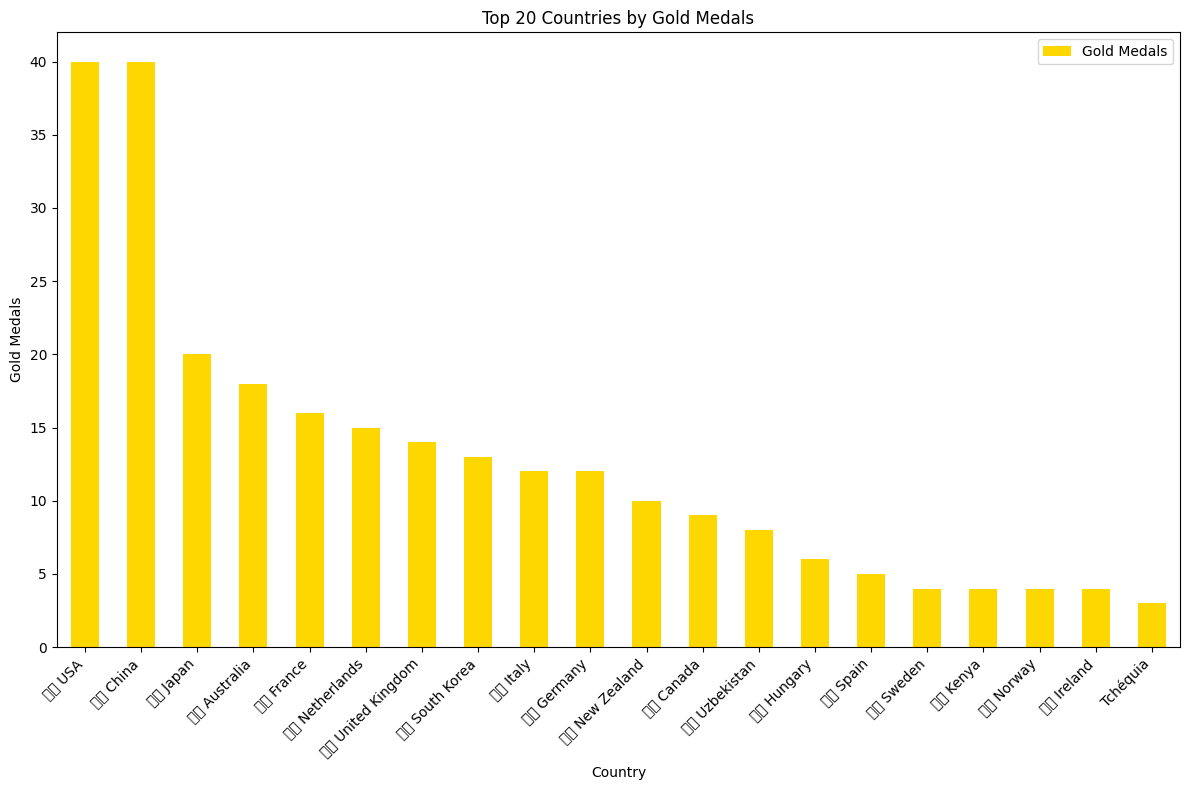

In [ ]:
# Install the pycountry library if not already installed
!pip install pycountry

# Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pycountry

# Function to get the country flag emoji based on the country name
def get_flag(country_name):
    try:
        # Lookup the country code using pycountry
        country_code = pycountry.countries.lookup(country_name).alpha_2
        # Convert the country code to the corresponding flag emoji
        flag_emoji = chr(127462 + ord(country_code[0]) - ord('A')) + chr(127462 + ord(country_code[1]) - ord('A'))
        return flag_emoji
    except LookupError:
        # Return an empty string if the country name is not found
        return ""

# Function to fetch data from the given API URL
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data: {response.status_code}")
        return None

# Function to correct or translate country names if needed
def correct_country_names(country_name):
    corrections = {
        "EUA": "USA",
        "Grã-Bretanha": "United Kingdom",
        "Alemanha": "Germany",
        "França": "France",
        "Japão": "Japan",
        "República da Coréia": "South Korea",
        "Países Baixos": "Netherlands",
        "Austrália": "Australia",
        "Canadá": "Canada",
        "Itália": "Italy",
        "Suécia": "Sweden",
        "Hungria": "Hungary",
        "República Dominicana": "Dominican Republic",
        "África do Sul": "South Africa",
        "Nova Zelândia": "New Zealand",
        "Brasil": "Brazil",
        "Argentina": "Argentina",
        "México": "Mexico",
        "Egito": "Egypt",
        "Espanha": "Spain",
        "Quênia": "Kenya",
        "Noruega": "Norway",
        "Irlanda": "Ireland",
        "Uzbequistão": "Uzbekistan"
        # Add more corrections as necessary
    }
    return corrections.get(country_name, country_name)

# Function to process gold medal counts data into a DataFrame
def process_medal_counts(medal_counts):
    if not medal_counts:
        return pd.DataFrame()
    medals_list = []
    for country in medal_counts.get('data', []):
        corrected_country_name = correct_country_names(country['name'])
        flag = get_flag(corrected_country_name)
        medals_list.append({
            'Country': f"{flag} {corrected_country_name}",
            'Gold Medals': country['gold_medals'],
        })
    return pd.DataFrame(medals_list)

# Fetch and process medal counts data
request_url = "https://apis.codante.io/olympic-games/countries"
medal_counts = fetch_data(request_url)
medal_counts_df = process_medal_counts(medal_counts)

# Display the DataFrame
print(medal_counts_df)

# Function to visualize gold medal counts
def plot_gold_medal_counts(df):
    if df.empty:
        print("No data to plot.")
        return
    df = df.sort_values(by='Gold Medals', ascending=False).head(20)
    df.plot(kind='bar', x='Country', y='Gold Medals', color='gold', figsize=(12, 8))
    plt.title('Top 20 Countries by Gold Medals')
    plt.xlabel('Country')
    plt.ylabel('Gold Medals')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot the gold medal counts
plot_gold_medal_counts(medal_counts_df)

                Country  Gold Medals  Silver Medals  Bronze Medals  \
0                   USA           40             44             42   
1                 China           40             27             24   
2                 Japan           20             12             13   
3             Australia           18             19             16   
4                France           16             26             22   
5           Netherlands           15              7             12   
6        United Kingdom           14             22             29   
7           South Korea           13              9             10   
8                 Italy           12             13             15   
9               Germany           12             13              8   
10          New Zealand           10              7              3   
11               Canada            9              7             11   
12           Uzbekistan            8              2              3   
13              Hung

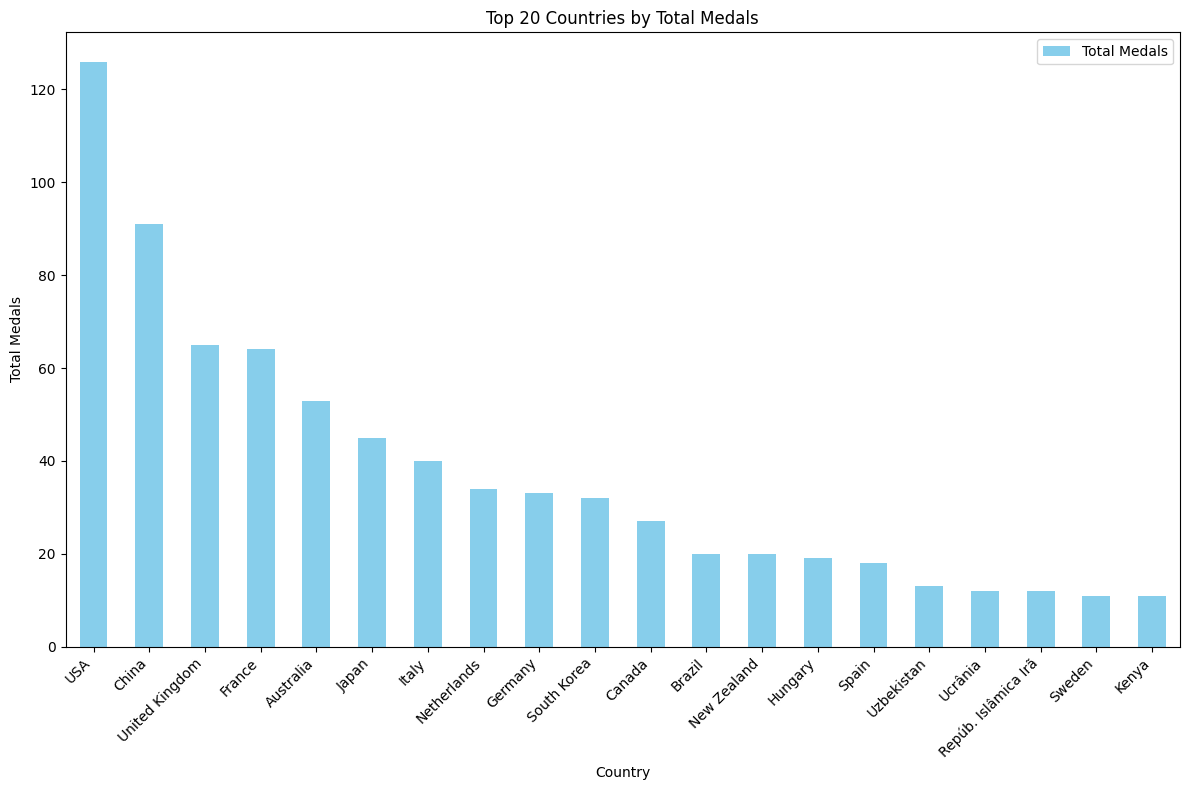

In [ ]:
# Process and visualize total medal counts data for 2024

def process_medal_counts(medal_counts):
    if not medal_counts:
        return pd.DataFrame()
    medals_list = []
    for country in medal_counts.get('data', []):
        corrected_country_name = correct_country_names(country['name'])
        medals_list.append({
            'Country': corrected_country_name,
            'Gold Medals': country['gold_medals'],
            'Silver Medals': country['silver_medals'],
            'Bronze Medals': country['bronze_medals'],
            'Total Medals': country['total_medals']
        })
    return pd.DataFrame(medals_list)

# Convert data to DataFrame
medal_counts_df = process_medal_counts(medal_counts)

# Display DataFrame
print(medal_counts_df)

# Visualize total medal counts
def plot_total_medal_counts(df):
    if df.empty:
        print("No data to plot.")
        return
    df = df.sort_values(by='Total Medals', ascending=False).head(20)
    df.plot(kind='bar', x='Country', y='Total Medals', color='skyblue', figsize=(12, 8))
    plt.title('Top 20 Countries by Total Medals')
    plt.xlabel('Country')
    plt.ylabel('Total Medals')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_total_medal_counts(medal_counts_df)



In [ ]:
# Function to get medal count for a specific country for 2024

def get_medal_count(country_name):
    if medal_counts_df.empty:
        print("No data available.")
        return None
    country_name_corrected = correct_country_names(country_name)
    country_data = medal_counts_df[medal_counts_df['Country'].str.lower() == country_name_corrected.lower()]
    if not country_data.empty:
         return country_data.iloc[0].to_dict()
    else:
        print(f"No data found for {country_name}.")
        return None

# Example usage
country_name = input("Enter the country name: ")
medal_count = get_medal_count(country_name)
if medal_count is not None:
    for key, value in medal_count.items():
       print(f"{key}: {value}")